In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#Check for CUDA Availability
device = torch.device("CUDA" if torch.cuda.is_available() else "cpu")
print("Device is:", device)

Device is: cpu


Data Collection and Preprocessing

In [4]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

In [55]:
# View the feature names
print("Feature names:", dataset.feature_names)

# View the dataset description
print("\nDataset description:", dataset.DESCR)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Dataset description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - p

Visualise the data in the form of a Pandas Dataframe

In [68]:
# Create a DataFrame using the features and target
df = pandas.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target (malignant/benign) as a column in the DataFrame
df['target'] = dataset.target

# Show the first few rows of the DataFrame
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Number of features: 31


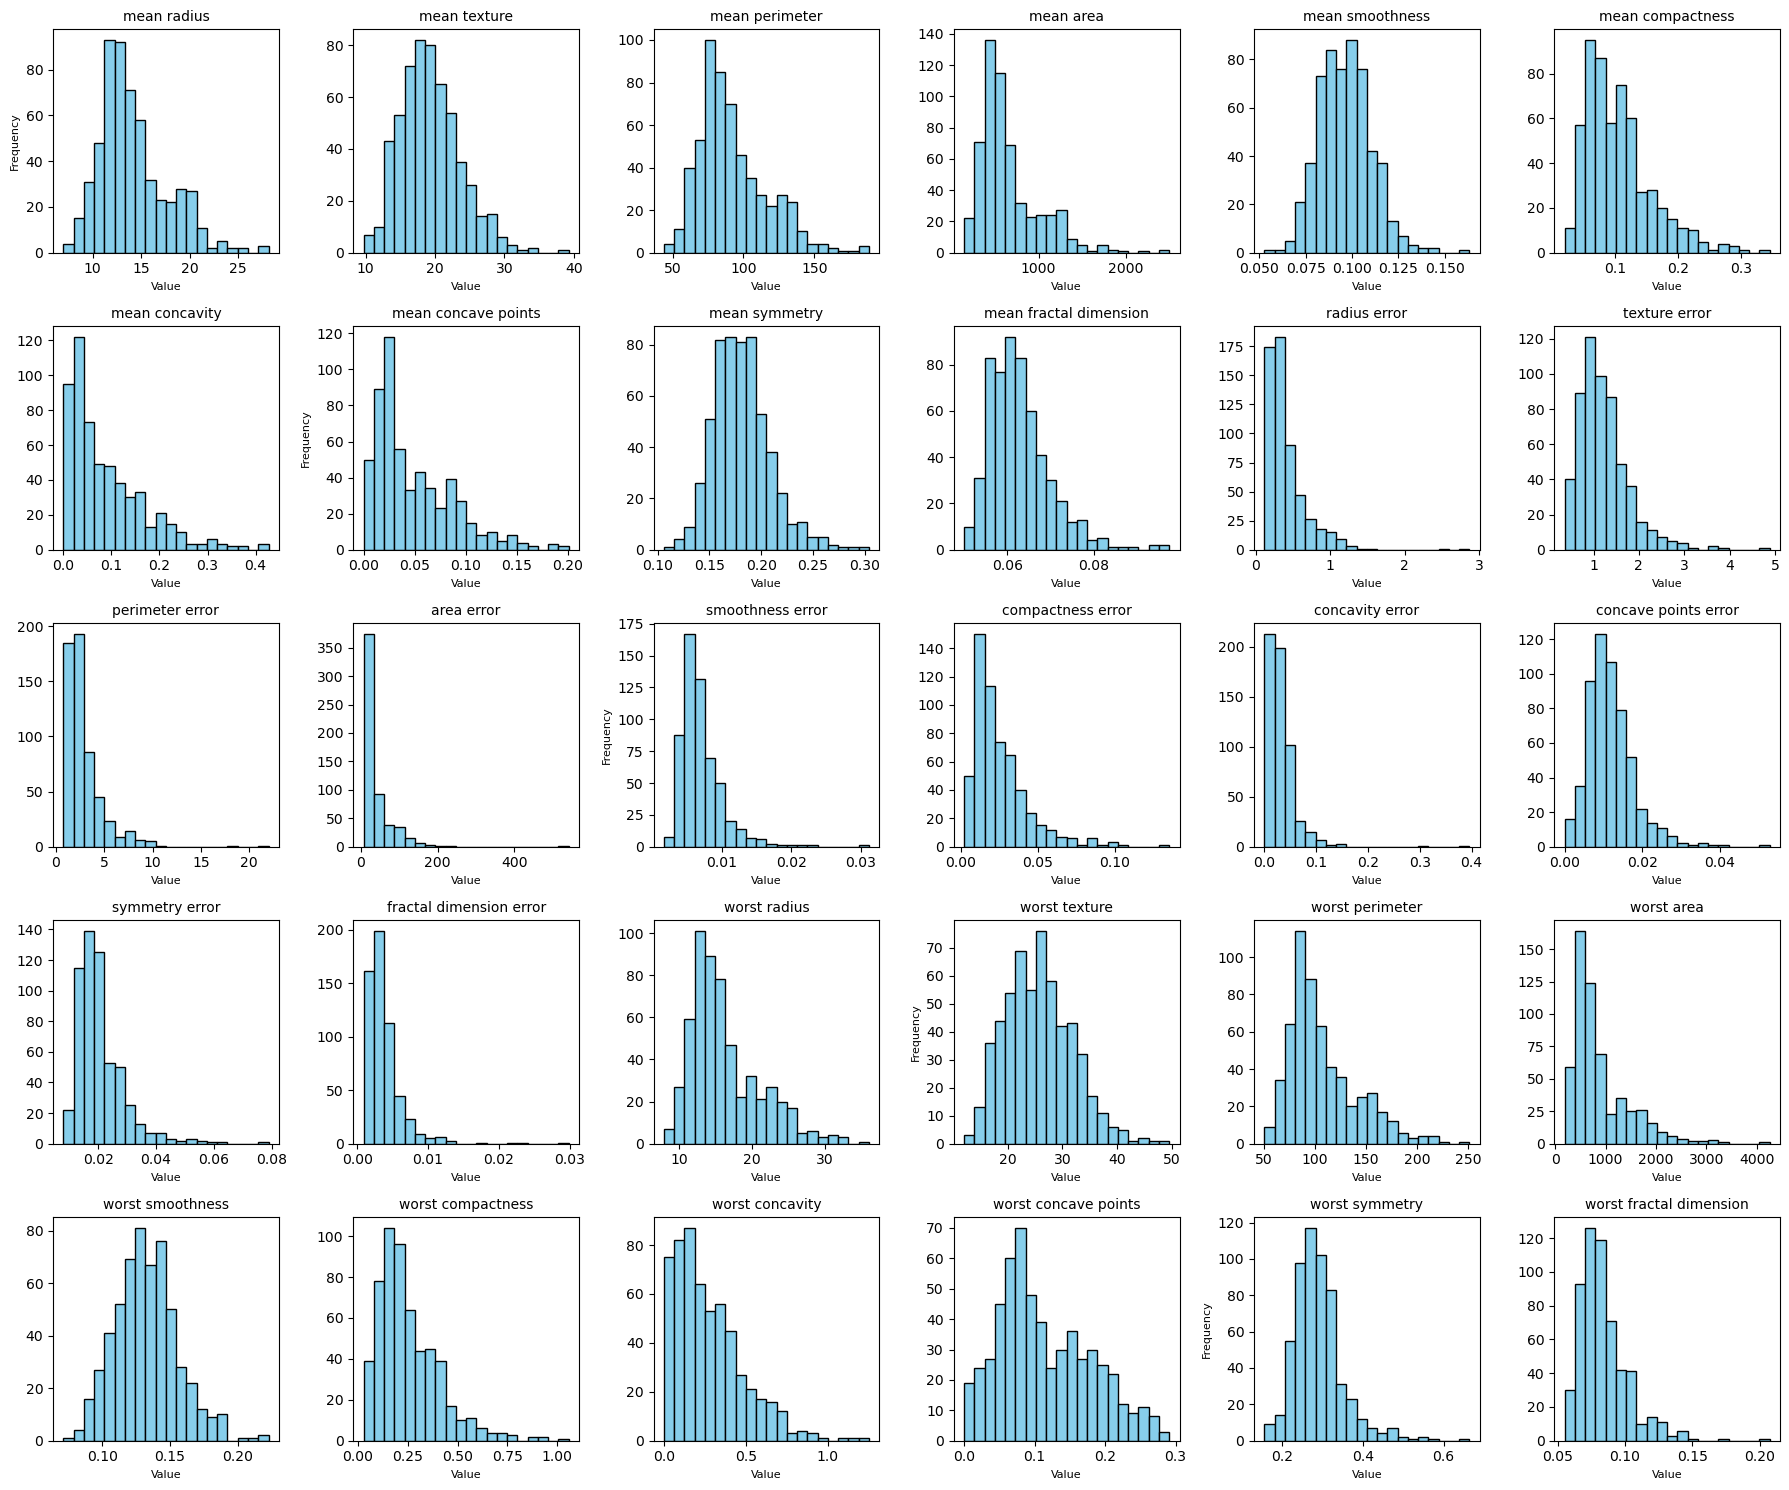

In [88]:
# Check the number of features
num_features = df.shape[1]
print(f"Number of features: {num_features}")

# Set up the subplots (5 rows, 6 columns)
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(18, 15))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each feature and create a plot
for i, feature in enumerate(df.columns):
    if i < len(axes): # Ensure we don't go beyond the number of available subplots
        axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(feature, fontsize=10)
        axes[i].set_xlabel('Value', fontsize=8)
        axes[i].set_ylabel('Frequency'if i % 7 == 0 else None, fontsize=8) 

# Adjust layout to make it more readable
plt.tight_layout()
plt.show()

In [5]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Split the dataset into training set and validation set

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Standardize the data to avoid data leakage issues. This ensures that the data is normally distributed, i.e., has a mean of 0 and a standard deviation of 1.

If you fit the scaler on the entire dataset (including both X_train and X_test), the model might inadvertently get access to future information (from the test set), leading to overly optimistic performance during training. This undermines the purpose of having a separate test set to evaluate model performance. The test set should represent unseen, real-world data, which should only be scaled according to what was learned from the training data

In [8]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #both fit and transform
X_test = scaler.transform(X_test) #only transform

Now we need to check the data type of the dataset. If we plan to use PyTorch, the data type needs to be tensors 

In [9]:
print(type(X_train))

<class 'numpy.ndarray'>


In [36]:
#transform numpy array into PyTorch tensors

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

C:\Users\guill\AppData\Local\Temp\ipykernel_15460\4140705270.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\guill\AppData\Local\Temp\ipykernel_15460\4140705270.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\guill\AppData\Local\Temp\ipykernel_15460\4140705270.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train = torch.tensor(Y_train, dtype=torch.float32)
C:\Users\guill\AppData\Local\Temp\ipykernel_1546

Now we will build the Neural Network Architecture

In [42]:
# Define the NN architecture

class NeuralNet(nn.Module): # Here we inherit the charateristcs (methods, parameters) of nn.module onto the NeuralNet class

    def __init__(self, input_size, hidden_size, output_size): # Initiating the class with the self
        super(NeuralNet, self).__init__()

        #fc1 = 1st fully connected layer / Does a linear transformation of the data
        self.fcl = nn.Linear(input_size, hidden_size) # Here, the OUTPUT will be hidden_size
        
        # Add non-linearity to the data, so as to capture complex relationships in the data
        self.relu = nn.ReLU() 

        #fc2 = 2nd fully connected layer
        self.fc2 = nn.Linear(hidden_size, output_size) # Here, the INPUT will be hidden_size

        #For binary classification we use sigmoid activation function, which give the output between 0 and 1.
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fcl(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
    

 

In [43]:
 # Define hyperparameters

input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.01 # One can play with this values.
num_epochs = 100 # One can play with this values.

In [44]:
model = NeuralNet(input_size, hidden_size, output_size)

In [45]:
#Define loss and the optimiser

criterion = nn.BCELoss() #BCELoss = Binary Cross Entropy Loss, which is commonly used in binary classification problems, where the task is to classify inputs into one of two classes. It's a measure of how well the model's predicted probabilities match the true binary labels
optimiser = optim.Adam(model.parameters(), lr = learning_rate) 


Training the Neural Network

In [46]:
# Training the model

# Epoch is when your entire model has gone through the process of forward and backward propagation
for epoch in range(num_epochs):
    model.train()
    optimiser.zero_grad() # Each time the batch is passed, it resets the gradients to 0.
    outputs = model(X_train)
    loss = criterion(outputs, Y_train.view(-1,1))
    loss.backward()
    optimiser.step() # Updation of weights and biases.

    # Calculate accuracy
    with torch.no_grad():
        predicted = outputs.round()
        correct = (predicted == Y_train.view(-1,1)).float().sum()
        accuracy = correct/Y_train.size(0)

    #For every tenth iteration, we se the loss and accuracy of the training
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}, Accuracy: {accuracy.item() * 100:.2f}%")
    

Epoch [10/100], Loss : 0.1112, Accuracy: 96.26%
Epoch [20/100], Loss : 0.0680, Accuracy: 98.02%
Epoch [30/100], Loss : 0.0538, Accuracy: 98.02%
Epoch [40/100], Loss : 0.0427, Accuracy: 98.46%
Epoch [50/100], Loss : 0.0347, Accuracy: 99.12%
Epoch [60/100], Loss : 0.0280, Accuracy: 99.34%
Epoch [70/100], Loss : 0.0222, Accuracy: 99.34%
Epoch [80/100], Loss : 0.0174, Accuracy: 99.34%
Epoch [90/100], Loss : 0.0135, Accuracy: 99.56%
Epoch [100/100], Loss : 0.0107, Accuracy: 99.78%


Model Evaluation

In [52]:
# Evaluation of training set
model.eval()

with torch.no_grad():

    outputs = model(X_train)
    predicted = outputs.round()
    correct = (predicted == Y_train.view(-1,1)).float().sum()
    accuracy = correct/Y_train.size(0)
    print(f"Accuracy on training data: {accuracy.item() * 100:.2f}%")

Accuracy on training data: 99.78%


In [53]:
# Evaluation of test set
model.eval()

with torch.no_grad():

    outputs = model(X_test)
    predicted = outputs.round()
    correct = (predicted == Y_test.view(-1,1)).float().sum()
    accuracy = correct/Y_test.size(0)
    print(f"Accuracy on test data: {accuracy.item() * 100:.2f}%")

Accuracy on test data: 98.25%
